# EDA with graphs

In [8]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from textwrap import wrap

In [9]:
path = "/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/"
path_to_img = path + "train_images/"
path_to_test = path + "test_images/"

In [12]:
num_imgs = len(os.listdir(path_to_img))
print("Number of images in train set: ", num_imgs)

Number of images in train set:  32411


In [27]:
test_df = pd.read_csv(path + "test.csv")
compute_cv = len(test_df) <= 3

if compute_cv:
    train_df = pd.read_csv(path + "train.csv")
    target_dict = train_df.groupby("label_group")["posting_id"].agg("unique").to_dict()
    train_df["target"] = train_df["label_group"].map(target_dict)
    dataset = train_df
else:
    dataset = test_df

In [25]:
len(dataset)

34250

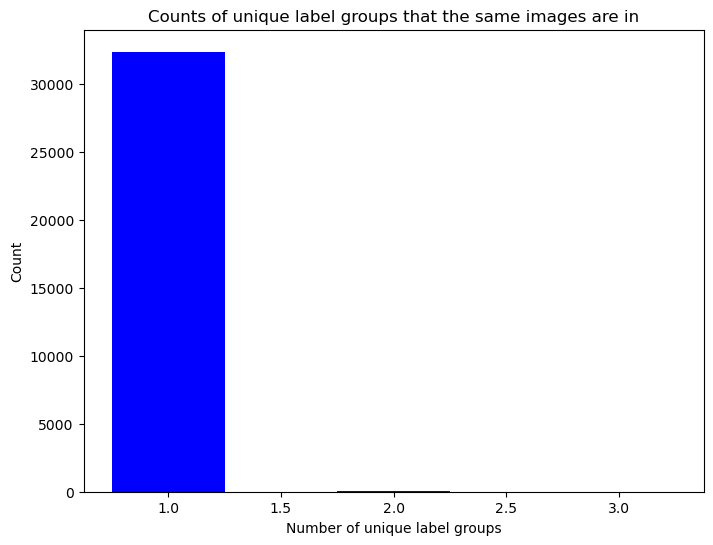

In [26]:


# Count the number of unique label groups that each image is in
image_counts = dataset.groupby("image")["label_group"].nunique()

# Count the number of images in each label group
label_counts = dataset["label_group"].value_counts()

# Count the number of label groups that have images in common
overlap_counts = image_counts.value_counts().sort_index()

# Create a bar plot of the overlap counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(overlap_counts.index, overlap_counts.values, width=0.5, color="blue")

# Set the x-axis and y-axis labels
ax.set_xlabel("Number of unique label groups")
ax.set_ylabel("Count")

# Set the title of the plot
ax.set_title("Counts of unique label groups that the same images are in")

# Display the plot
plt.show()


## Show image in the same class

In [23]:
def show_random_images():
    n_rows, n_cols = 4, 6
    n_images = n_rows * n_cols
    label_groups = np.random.choice(dataset["label_group"].unique(), size=n_images, replace=False)

    fig, axes = plt.subplots(figsize=(18, 12), nrows=n_rows, ncols=n_cols)
    img_to_show = []
    for label_group in label_groups:
        rows = dataset[dataset["label_group"] == label_group].sample(n=2, replace=False)
        img_to_show += rows[["image", "title"]].values.tolist()

    if len(img_to_show) > n_images:
        img_to_show = img_to_show[:n_images]

    for i, (img_path, title) in enumerate(img_to_show):
        img = cv2.imread(os.path.join(path_to_img, img_path))
        title = "\n".join(wrap(title, 20))
        ax = axes.flat[i]
        ax.set_title(title, fontsize=8)
        ax.imshow(img)
        ax.axis("off")

    fig.tight_layout()


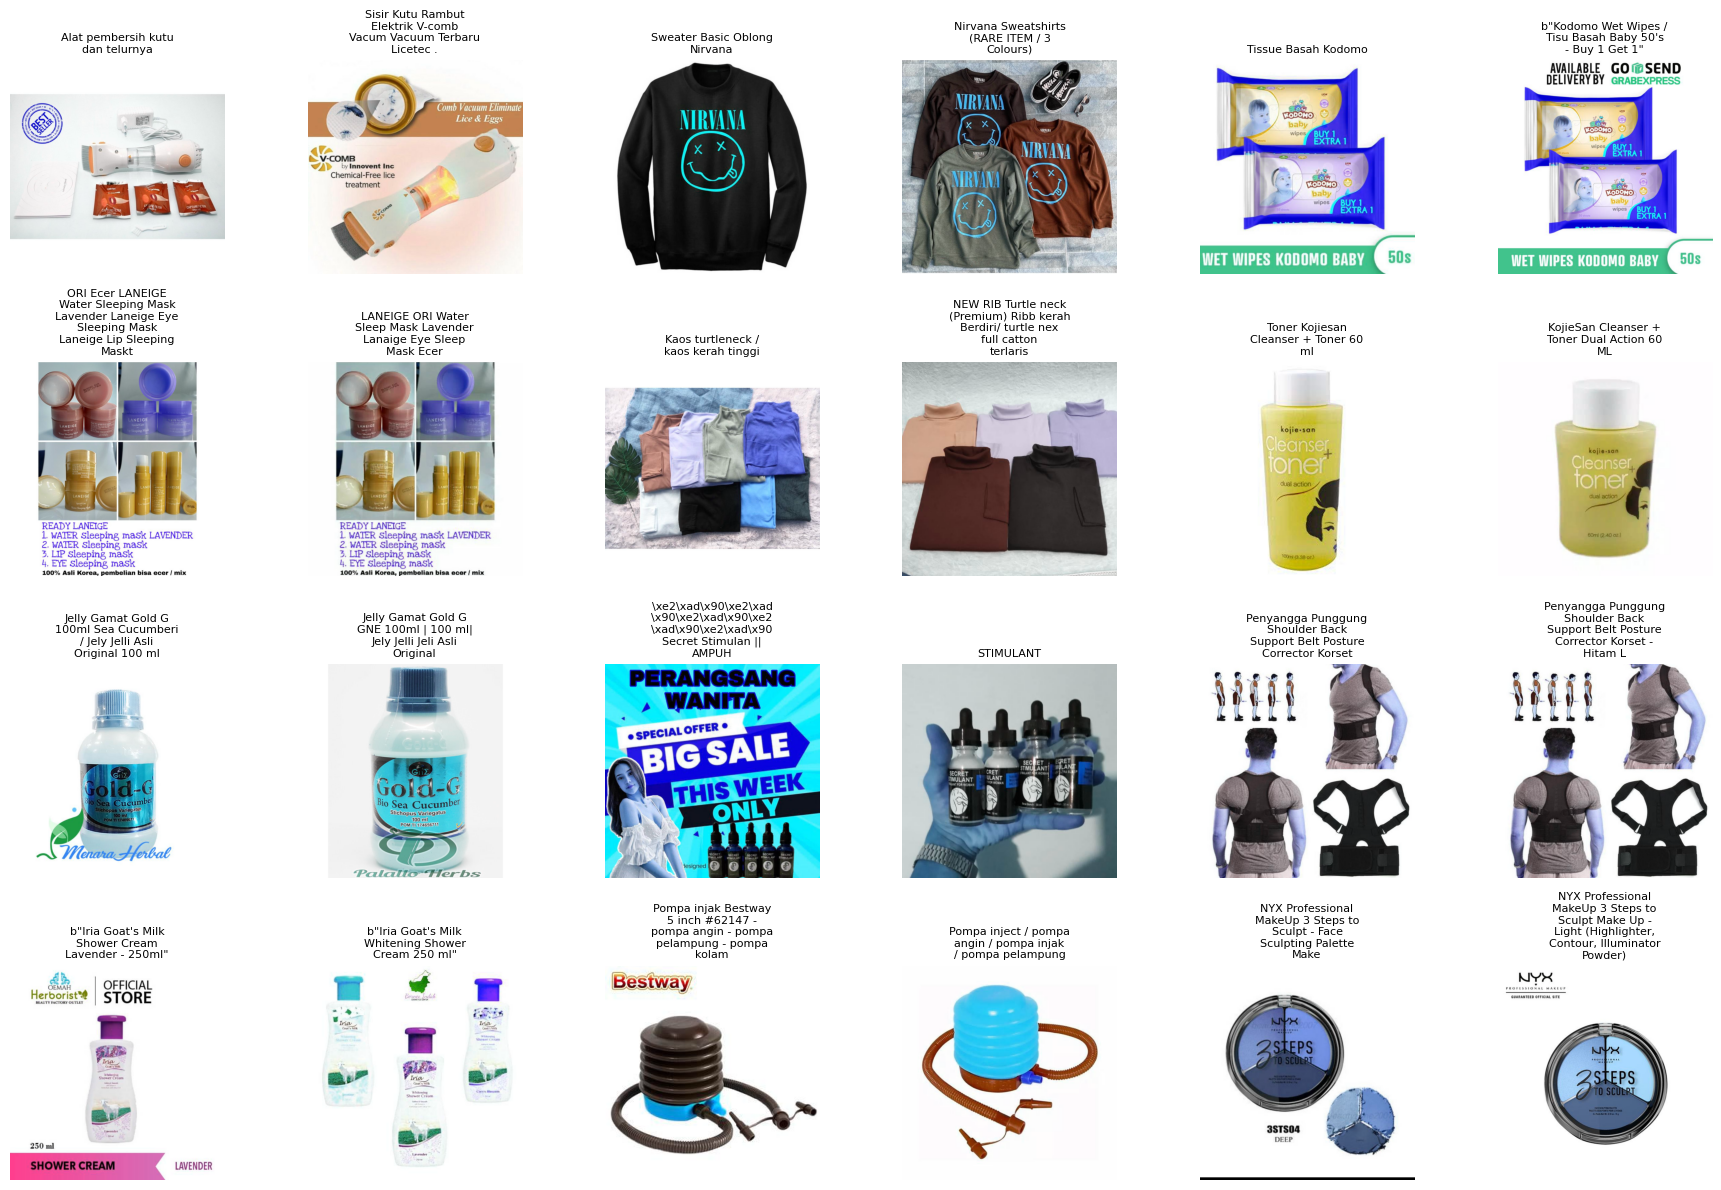

In [24]:
if compute_cv:
    show_random_images()